

# Project: Investigating Movies Data!

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Overview**:I chose to work with movies data from TMDb, The dataset contains data for over 10k movies with 21 attributes, like( imdb_id, revenues, budget...etc). 

> **Questions:**

        1-What are the top 5 movies that have the highest budgets?
        2-How much is the budget of these movies?
        3-How much revenues it generated?
        4-what movie is the most successful based on the difference between revenue minus budget?
        5-What are the ratings of these movies?
        6-What is the average run time of the movies with a rating higher than 7/10?
        7-In what range of years does the movies has the highest ratings?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

df1 = pd.read_csv("movies.csv")
df1.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling

>  After some exploring with the dataset I determined what attributes will be useful to use to answer the questions listed above.

### General Properties

In [2]:
#df1.shape
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [3]:
df2 = df1.drop(columns=["id", "imdb_id","popularity", "homepage", "director", "cast", "overview","genres", "tagline", "keywords", "production_companies","release_date", "vote_count", "budget_adj", "revenue_adj" ])
df2.head()

,budget,revenue,original_title,runtime,vote_average,release_year
0,150000000,1513528810,Jurassic World,124,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,120,7.1,2015
2,110000000,295238201,Insurgent,119,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,136,7.5,2015
4,190000000,1506249360,Furious 7,137,7.3,2015


In [4]:
#making sure all data types are proper
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 6 columns):
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 509.4+ KB


In [5]:
#checking, dropping duplicates
sum(df2.duplicated())

1

In [6]:
df3 = df2.drop_duplicates()

In [7]:
#checking if it was successful
sum(df3.duplicated())

0

In [8]:
#checking for null values
df3.isnull().values.any()

False

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What are the top 5 movies that has the highest budgets?

In [9]:
#sorting DF descendingly based on the budgets values
df4= df3.sort_values('budget',ascending=False)
df4.head(5)

,budget,revenue,original_title,runtime,vote_average,release_year
2244,425000000,11087569,The Warrior's Way,100,6.4,2010
3375,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,136,6.3,2011
7387,300000000,961000000,Pirates of the Caribbean: At World's End,169,6.8,2007
14,280000000,1405035767,Avengers: Age of Ultron,141,7.4,2015
6570,270000000,391081192,Superman Returns,154,5.3,2006


In [21]:
#creating python function to print out head rows
def calling(x,y,z,n):
    print(x[[y,z]].head(n))

In [22]:
#Listing the names of the movies with the highest budgets
print(df4[["original_title"]].head(5))

                                   original_title
2244                            The Warrior's Way
3375  Pirates of the Caribbean: On Stranger Tides
7387     Pirates of the Caribbean: At World's End
14                        Avengers: Age of Ultron
6570                             Superman Returns


### Research Question 2:	How much are the budgets for these movies?

In [23]:
calling(df4,"original_title","budget",5)

                                   original_title     budget
2244                            The Warrior's Way  425000000
3375  Pirates of the Caribbean: On Stranger Tides  380000000
7387     Pirates of the Caribbean: At World's End  300000000
14                        Avengers: Age of Ultron  280000000
6570                             Superman Returns  270000000


### Research Question 3:	How much revenues these movies generated?

In [24]:
calling(df4,"original_title","revenue",5)

                                   original_title     revenue
2244                            The Warrior's Way    11087569
3375  Pirates of the Caribbean: On Stranger Tides  1021683000
7387     Pirates of the Caribbean: At World's End   961000000
14                        Avengers: Age of Ultron  1405035767
6570                             Superman Returns   391081192


### Research Question 4:	What movie "from the previous questions" is the most successful based on the difference betweem revenue minus budget?
>To do this I created a new attribute with the values of revenues minus budget.

The most Successful movie amongst the highest budgets is:  Avengers: Age of Ultron


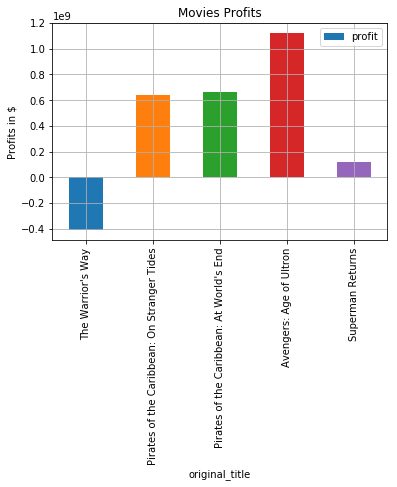

In [73]:
#determining what movie is the most successful based on the difference betweem revenue minus budget
df4["profit"] = df4["revenue"] - df4["budget"]
#creating new DF for the highest 5 budgets
highest5 = df4.head(5)
print("The most Successful movie amongst the highest budgets is: ",highest5["original_title"].loc[highest5["profit"].idxmax()])

#plotting the graph
movienames = ["The Warrior's Way","Pirates of the Caribbean: On Stranger Tides", "irates of the Caribbean: At World's End","Avengers: Age of Ultron","Superman Returns"]
i = highest5.plot(x="original_title", y="profit", grid=True, kind="bar", title="Movies Profits");
i.set_ylabel("Profits in $");

### Observation: 
>Based on  the chart above, we can conclude that a high budget movie does not mean or guarantee it's success. As Avengers: age of ultron being the fourth highest budget, it made the highest profit.

### Research Question 5:	What are the ratings of these movies?

In [62]:
calling(df4,"original_title","vote_average",5)

                                   original_title  vote_average
2244                            The Warrior's Way           6.4
3375  Pirates of the Caribbean: On Stranger Tides           6.3
7387     Pirates of the Caribbean: At World's End           6.8
14                        Avengers: Age of Ultron           7.4
6570                             Superman Returns           5.3


### Research Question 6: What is the average run time of the movies with a rating higher than 7/10?

In [63]:
#creating new DF where rating is higher than 7
df5 =df4[df4["vote_average"]>7]
#calculating and printing average runtime
print("The Average runtime for Movies with a rating higher than 7 is", round(df5["runtime"].mean()))

The Average runtime for Movies with a rating higher than 7 is 108.0


### Research Question 7: In what range of years does the movies has the highest ratings?

In [64]:
#cheching time frame
print(sorted(df4["release_year"].unique()))

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


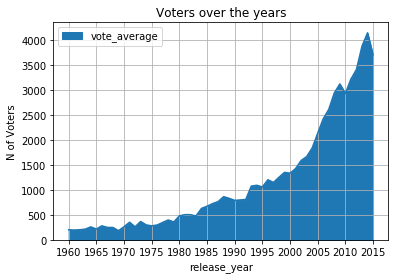

In [76]:
#making list with 5 years apart from the min,max release years
x = [1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015]
#plotting the graph
j = df4.groupby(['release_year']).sum().plot(kind='area', xticks=x, y='vote_average',grid=True, title="Voters over the years");
j.set_ylabel("N of Voters");

### Observation:
>As years move, number of voters increase along with it. That is probably due to the ease of voting with modren day technologies.

### Limitations:
>One limitaion I faced working with the data set was trying to figure out what genre was the main for each movie since there were many in each row it was almost impossible to determine which one was the main, this also applicable to the cast column, it's was quite difficult to determine who's the main actor/actress without running a web scraping script. 

<a id='conclusions'></a>
## Conclusions

> Working with this data set has given me a clearer insights on the movie making industry, for example: 

> 1-The fact that a movie has a high budget does not mean it will do well in the box office, i.e. profit does not mean budget.

> 2-Movies rating may vary over the year, not for the quality of the movies per say, but because the number of voters has increased due to technological advancement and the ease of voting.

> 3-Highest ratings movies have an average runtime of one hour and 48 mins “108 mins”.



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0